In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(style="darkgrid")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Data for forward truncation

In [4]:
# merge each model's summaries generated using differently truncated inputs for analysis
bart = pd.read_csv('/content/drive/MyDrive/NLP Summarization Project/Generated Summaries/1f BART_finetuned on optimal hp_beam2.csv')
bart_half = pd.read_csv('/content/drive/MyDrive/NLP Summarization Project/Generated Summaries/2a BART_forward truncation 50 percent remain_beam2.csv')
bart_quarter = pd.read_csv('/content/drive/MyDrive/NLP Summarization Project/Generated Summaries/2b BART_forward truncation 25 percent remain_beam2.csv')
bart_eighth = pd.read_csv('/content/drive/MyDrive/NLP Summarization Project/Generated Summaries/2c BART_forward truncation 12.5 percent remain_beam2.csv')

pegasus = pd.read_csv('/content/drive/MyDrive/NLP Summarization Project/Generated Summaries/1b PEGASUS_beam5.csv')
pegasus_half = pd.read_csv('/content/drive/MyDrive/NLP Summarization Project/Generated Summaries/2d PEGASUS_forward truncation 50 percent remain_beam5.csv')
pegasus_quarter = pd.read_csv('/content/drive/MyDrive/NLP Summarization Project/Generated Summaries/2e PEGASUS_forward truncation 25 percent remain_beam5.csv')

bart_forward_df = bart[['original_row_idx', 'article', 'summary', 'generated', 'source', 'rouge2r']]\
           .merge(bart_half[['original_row_idx', 'rouge2r']], on = 'original_row_idx', how = 'left')\
           .merge(bart_quarter[['original_row_idx', 'rouge2r']], on = 'original_row_idx', how = 'left')\
           .merge(bart_eighth[['original_row_idx', 'rouge2r']], on = 'original_row_idx', how = 'left')

bart_forward_df.columns = ['original_row_idx', 'article', 'summary', 'generated', 'source', 'full', 'half', 'quarter', 'eighth']

pegasus_forward_df = pegasus[['original_row_idx', 'article', 'summary', 'generated', 'source', 'rouge2r']]\
           .merge(pegasus_half[['original_row_idx', 'rouge2r']], on = 'original_row_idx', how = 'left')\
           .merge(pegasus_quarter[['original_row_idx', 'rouge2r']], on = 'original_row_idx', how = 'left')

pegasus_forward_df.columns = ['original_row_idx', 'article', 'summary', 'generated', 'source', 'full', 'half', 'quarter']

In [5]:
# concatenate each model's summaries generated using differently truncated inputs for seaborn plots

bart['Percent Tokens Remaining'] = 100
bart_half['Percent Tokens Remaining'] = 50
bart_quarter['Percent Tokens Remaining'] = 25
bart_eighth['Percent Tokens Remaining'] = 12.5

bart['model'] = 'BART'
bart_half['model'] = 'BART'
bart_quarter['model'] = 'BART'
bart_eighth['model'] = 'BART'

pegasus['Percent Tokens Remaining'] = 100
pegasus_half['Percent Tokens Remaining'] = 50
pegasus_quarter['Percent Tokens Remaining'] = 25

pegasus['model'] = 'PEGASUS'
pegasus_half['model'] = 'PEGASUS'
pegasus_quarter['model'] = 'PEGASUS'

forward_plot_df = pd.concat([bart, bart_half, bart_quarter, bart_eighth, pegasus, pegasus_half,pegasus_quarter ]).groupby(['Percent Tokens Remaining', 'model']).mean()\
    [['rouge1f', 'rouge2f', 'rougeLf', 'rouge1r', 'rouge2r', 'rougeLr']].unstack(-1).swaplevel(i=0, j=1, axis=1)

forward_plot_df = pd.melt(forward_plot_df[[('BART', 'rouge2f'),('BART', 'rouge2r'),('PEGASUS', 'rouge2f'),('PEGASUS', 'rouge2r')]].stack(0).reset_index(), 
                  id_vars=['model', 'Percent Tokens Remaining']).sort_values(['model', 'variable', 'Percent Tokens Remaining'])

forward_plot_df['Rouge-2 Metric'] = forward_plot_df['variable'].replace({'rouge2r': 'Recall', 'rouge2f': 'F-1'})

## Data for backward truncation

In [6]:
# merge each model's summaries generated using differently truncated inputs for analysis
bart_half = pd.read_csv('/content/drive/MyDrive/NLP Summarization Project/Generated Summaries/2f BART_backward truncation 87.5 percent remain_beam2.csv')
bart_quarter = pd.read_csv('/content/drive/MyDrive/NLP Summarization Project/Generated Summaries/2g BART_backward truncation 75 percent remain_beam2.csv')
bart_eighth = pd.read_csv('/content/drive/MyDrive/NLP Summarization Project/Generated Summaries/2h BART_backward truncation 50 percent remain_beam2.csv')

bart_reverse_df = bart[['original_row_idx', 'article', 'summary', 'generated', 'source', 'rouge2r']]\
           .merge(bart_eighth[['original_row_idx', 'rouge2r']], on = 'original_row_idx', how = 'left')\
           .merge(bart_quarter[['original_row_idx', 'rouge2r']], on = 'original_row_idx', how = 'left')\
           .merge(bart_half[['original_row_idx', 'rouge2r']], on = 'original_row_idx', how = 'left')

bart_reverse_df.columns = ['original_row_idx', 'article', 'summary', 'generated', 'source', 'full', 'eighth', 'quarter', 'half']

pegasus_half = pd.read_csv('/content/drive/MyDrive/NLP Summarization Project/Generated Summaries/2i PEGASUS_backward truncation 75 percent remain_beam2.csv')
pegasus_quarter = pd.read_csv('/content/drive/MyDrive/NLP Summarization Project/Generated Summaries/2j PEGASUS_backward truncation 50 percent remain_beam5.csv')

pegasus_reverse_df = pegasus[['original_row_idx', 'article', 'summary', 'generated', 'source', 'rouge2r']]\
           .merge(pegasus_quarter[['original_row_idx', 'rouge2r']], on = 'original_row_idx', how = 'left')\
           .merge(pegasus_half[['original_row_idx', 'rouge2r']], on = 'original_row_idx', how = 'left')

pegasus_reverse_df.columns = ['original_row_idx', 'article', 'summary', 'generated', 'source', 'full', 'quarter', 'half']

In [7]:
# concatenate each model's summaries generated using differently truncated inputs for seaborn plots
bart['Percent Tokens Remaining'] = 100
bart_eighth['Percent Tokens Remaining'] = 87.5
bart_quarter['Percent Tokens Remaining'] = 75
bart_half['Percent Tokens Remaining'] = 50

bart['model'] = 'BART'
bart_half['model'] = 'BART'
bart_quarter['model'] = 'BART'
bart_eighth['model'] = 'BART'

pegasus['Percent Tokens Remaining'] = 100
pegasus_quarter['Percent Tokens Remaining'] = 75
pegasus_half['Percent Tokens Remaining'] = 50

pegasus['model'] = 'PEGASUS'
pegasus_half['model'] = 'PEGASUS'
pegasus_quarter['model'] = 'PEGASUS'

reverse_plot_df = pd.concat([bart, bart_half, bart_quarter, bart_eighth, pegasus, pegasus_half,pegasus_quarter ]).groupby(['Percent Tokens Remaining', 'model']).mean()\
    [['rouge1f', 'rouge2f', 'rougeLf', 'rouge1r', 'rouge2r', 'rougeLr']].unstack(-1).swaplevel(i=0, j=1, axis=1)

reverse_plot_df = pd.melt(reverse_plot_df[[('BART', 'rouge2f'),('BART', 'rouge2r'),('PEGASUS', 'rouge2f'),('PEGASUS', 'rouge2r')]].stack(0).reset_index(), 
                  id_vars=['model', 'Percent Tokens Remaining']).sort_values(['model', 'variable', 'Percent Tokens Remaining'])

reverse_plot_df['Rouge-2 Metric'] = reverse_plot_df['variable'].replace({'rouge2r': 'Recall', 'rouge2f': 'F-1'})

## Lineplot of Rouge-2 under various truncation conditions

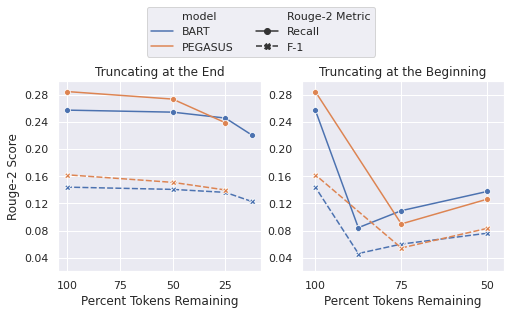

In [8]:
sns.set(style="darkgrid")
f, axes = plt.subplots(1, 2, figsize=(8, 3.5))

a = sns.lineplot(x="Percent Tokens Remaining", y="value", hue='model', markers=True, style = 'Rouge-2 Metric', style_order = ['Recall', 'F-1'], data = forward_plot_df, ax = axes[0])
a.invert_xaxis()
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles, labels, loc='lower center', bbox_to_anchor=(1, 1.1), ncol=2)
axes[0].set(ylabel = "Rouge-2 Score", ylim = (0.02, 0.30))
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(25))
axes[0].yaxis.set_major_locator(ticker.MultipleLocator(0.04))
axes[0].title.set_text('Truncating at the End')

b = sns.lineplot(x="Percent Tokens Remaining", y="value", hue='model', markers=True, style = 'Rouge-2 Metric', style_order = ['Recall', 'F-1'], data = reverse_plot_df, ax = axes[1])
b.invert_xaxis()
axes[1].set(ylabel = None, xlim = (104, 45), ylim = (0.02, 0.30))
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(25))
axes[1].yaxis.set_major_locator(ticker.MultipleLocator(0.04))
axes[1].title.set_text('Truncating at the Beginning')
axes[1].legend([],[], frameon=False)

## Correlations of article/summary length to Rouge-2 Delta

Forward truncation delta = no truncation - 75% truncation

Backward truncation delta = no truncation - 25% truncation

In [9]:
bart_forward_df['delta'] = bart_forward_df['full'] - bart_forward_df['quarter']
pegasus_forward_df['delta'] = pegasus_forward_df['full'] - pegasus_forward_df['quarter']

bart_reverse_df['delta'] = bart_reverse_df['full'] - bart_reverse_df['quarter']
pegasus_reverse_df['delta'] = pegasus_reverse_df['full'] - pegasus_reverse_df['quarter']

# get token count in article and reference summaries
article_count = bart[['original_row_idx', 'article', 'summary']].copy()
article_count['article_length'] = article_count['article'].apply(lambda x: len(word_tokenize(x)))
article_count['summary_length'] = article_count['summary'].apply(lambda x: len(word_tokenize(x)))
article_count = article_count[['original_row_idx', 'article_length', 'summary_length']]

# merge length counts to the analysis df
bart_forward_df = bart_forward_df.merge(article_count, on = 'original_row_idx', how = 'left')
bart_reverse_df = bart_reverse_df.merge(article_count, on = 'original_row_idx', how = 'left')
pegasus_forward_df = pegasus_forward_df.merge(article_count, on = 'original_row_idx', how = 'left')
pegasus_reverse_df = pegasus_reverse_df.merge(article_count, on = 'original_row_idx', how = 'left')

# change the article token count to 1024 or 512 to reflect the amount of input models actually received
bart_forward_df['article_length'] = bart_forward_df['article_length'].apply(lambda x: x if x < 1024 else 1024)
bart_reverse_df['article_length'] = bart_reverse_df['article_length'].apply(lambda x: x if x < 1024 else 1024)
pegasus_forward_df['article_length'] = pegasus_forward_df['article_length'].apply(lambda x: x if x < 512 else 512)
pegasus_reverse_df['article_length'] = pegasus_reverse_df['article_length'].apply(lambda x: x if x < 512 else 512)

In forward truncation, after removing 75% of non-padding tokens in the input articles, the delta of BART performance has no significant correlation to the original article length (corr = -0.022) or summary length (0.012). Scatter plot of 1000 random samples ruled out any obvious non-linear relationship. This means when forward truncating 75%, the drop in performance does not proportionally punish based on original article/reference summary length.

Repeating the same procedure for PEGASUS, the delta of 75% truncation and no truncation also has insignificant correlation to reference summary length (0.0021). However, correlation of delta to original article length is moderate (-0.13). Scatter plot of 1000 random samples also suggests the longer articles tend to have slightly smaller delta, implying that when forward truncating 75%, the drop in performance somewhat depends on the length of the article, longer articles suffer smaller decrease in performance. This may due to the shorter maximum input length of PEGASUS.

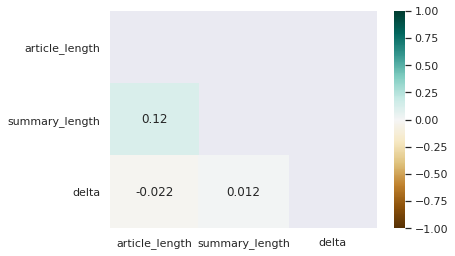

In [ ]:
corr = bart_forward_df[['article_length', 'summary_length', 'delta']].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

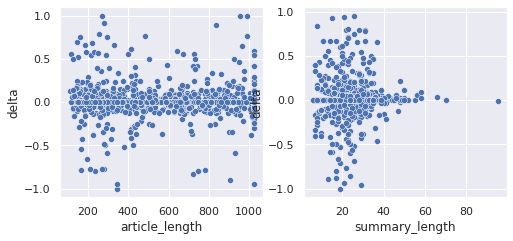

In [13]:
sns.set(style="darkgrid")
f, axes = plt.subplots(1, 2, figsize=(8, 3.5))
sns.scatterplot(data=bart_forward_df.sample(1000), x="article_length", y="delta", ax = axes[0])
sns.scatterplot(data=bart_forward_df.sample(1000), x="summary_length", y="delta", ax = axes[1])
plt.show()

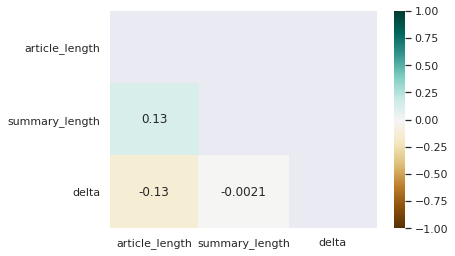

In [ ]:
corr = pegasus_forward_df[['article_length', 'summary_length', 'delta']].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

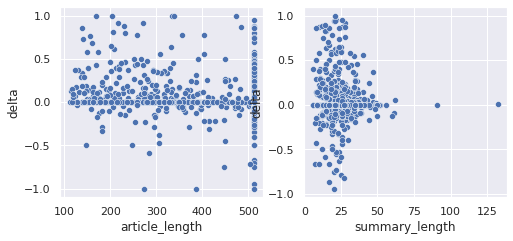

In [18]:
sns.set(style="darkgrid")
f, axes = plt.subplots(1, 2, figsize=(8, 3.5))
sns.scatterplot(data=pegasus_forward_df.sample(1000), x="article_length", y="delta", ax = axes[0])
sns.scatterplot(data=pegasus_forward_df.sample(1000), x="summary_length", y="delta", ax = axes[1])
plt.show()

In backward truncation, after removing 25% of non-padding tokens in the input articles, the delta of performance for both BART and PEGASUS have a moderate correlation to article length but not reference summary length.

Scatterplot of 1000 random sample ssuggest the longer articles tend to have slightly smaller drop in performance, or even negative delta.

This might indicate that when backward truncating 25%, the drop in performance is smaller for longer articles and greater for shorter articles. This may be due that shorter articles adhere more to the inverted pyramid writing style where the important information is concentrated in the beginning, whereas longer articles might include more expositions and have key information more spread out in the article.


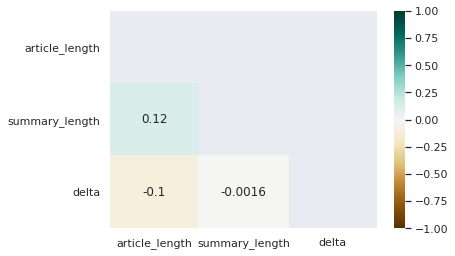

In [ ]:
corr = bart_reverse_df[['article_length', 'summary_length', 'delta']].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

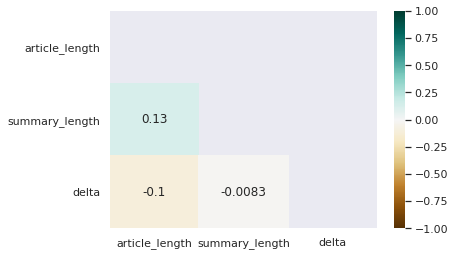

In [ ]:
corr = pegasus_reverse_df[['article_length', 'summary_length', 'delta']].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

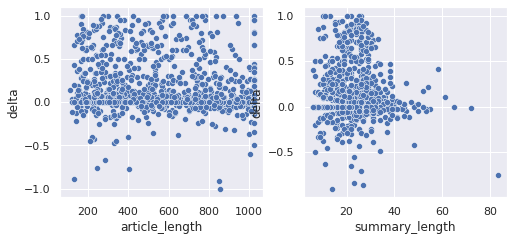

In [15]:
sns.set(style="darkgrid")
f, axes = plt.subplots(1, 2, figsize=(8, 3.5))
sns.scatterplot(data=bart_reverse_df.sample(1000), x="article_length", y="delta", ax = axes[0])
sns.scatterplot(data=bart_reverse_df.sample(1000), x="summary_length", y="delta", ax = axes[1])
plt.show()

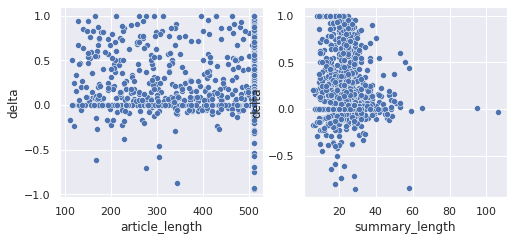

In [16]:
sns.set(style="darkgrid")
f, axes = plt.subplots(1, 2, figsize=(8, 3.5))
sns.scatterplot(data=pegasus_reverse_df.sample(1000), x="article_length", y="delta", ax = axes[0])
sns.scatterplot(data=pegasus_reverse_df.sample(1000), x="summary_length", y="delta", ax = axes[1])
plt.show()